# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [107]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(tf.__version__)

2.1.0


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [108]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


#Converting the matrix into 2 classes 0 - 4

In [0]:
y_train_class04 = np.empty(shape=y_train.shape,dtype='uint8')
X_train_class04 = np.empty(shape=X_train.shape,dtype='uint8')
i=0
j=0
for x in y_train[:]:
  if x >=0 and x<=4:
    y_train_class04[j]=x
    X_train_class04[j]=X_train[i]
    j=j+1
  i=i+1
y_train_class04=y_train_class04[0:j]
X_train_class04=X_train_class04[0:j]

y_test_class04 = np.empty(shape=y_test.shape,dtype='uint8')
X_test_class04 = np.empty(shape=X_test.shape,dtype='uint8')
i=0
j=0
for x in y_test[:]:
  if x >=0 and x<=4:
    y_test_class04[j]=x
    X_test_class04[j]=X_test[i]
    j=j+1
  i=i+1
y_test_class04=y_test_class04[0:j]
X_test_class04=X_test_class04[0:j]

Converting class from 5 to 10

In [0]:
y_train_class510 = np.empty(shape=y_train.shape,dtype='uint8')
X_train_class510 = np.empty(shape=X_train.shape,dtype='uint8')
i=0
j=0
for x in y_train[:]:
  if x >=5 and x<=10:
    y_train_class510[j]=x
    X_train_class510[j]=X_train[i]
    j=j+1
  i=i+1
y_train_class510=y_train_class510[0:j]
X_train_class510=X_train_class510[0:j]

y_test_class510 = np.empty(shape=y_test.shape,dtype='uint8')
X_test_class510 = np.empty(shape=X_test.shape,dtype='uint8')
i=0
j=0
for x in y_test[:]:
  if x >=5 and x<=10:
    y_test_class510[j]=x
    X_test_class510[j]=X_test[i]
    j=j+1
  i=i+1
y_test_class510=y_test_class510[0:j]
X_test_class510=X_test_class510[0:j]

In [111]:
print(np.unique(y_train_class04))
print(np.unique(y_test_class04))
print(np.unique(y_train_class510))
print(np.unique(y_test_class510))

[0 1 2 3 4]
[0 1 2 3 4]
[5 6 7 8 9]
[5 6 7 8 9]


In [112]:
print(X_train_class04.shape)
print(y_train_class04.shape)
print(X_test_class04.shape)
print(y_test_class04.shape)
print(X_train_class510.shape)
print(y_train_class510.shape)
print(X_test_class510.shape)
print(y_test_class510.shape)

(25000, 32, 32, 3)
(25000, 1)
(5000, 32, 32, 3)
(5000, 1)
(25000, 32, 32, 3)
(25000, 1)
(5000, 32, 32, 3)
(5000, 1)


Checking if the variables are matching

Example training images and their labels: [4, 1, 1, 2, 3]
Corresponding classes for the labels: ['deer', 'automobile', 'automobile', 'bird', 'cat']


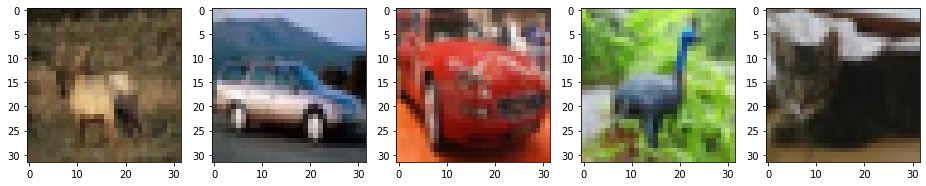

In [113]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train_class04[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train_class04[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train_class04[i]
    axarr[i].imshow(img)
plt.show()

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
#One-hot encoding the labels class 0 to 5
num_classes = 5
from keras.utils import np_utils
y_train_class04 = np_utils.to_categorical(y_train_class04, num_classes)
y_test_class04 = np_utils.to_categorical(y_test_class04, num_classes)
X_train_class04=X_train_class04/255
X_test_class04=X_test_class04/255

In [0]:
#One-hot encoding the labels for class 5 to 10
num_classes = 10
y_train_class510 = np_utils.to_categorical(y_train_class510, num_classes)
y_test_class510 = np_utils.to_categorical(y_test_class510, num_classes)
X_train_class510=X_train_class510/255
X_test_class510=X_test_class510/255

In [185]:
y_train_class510[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Shape of each image in the training data:  (32, 32, 3)


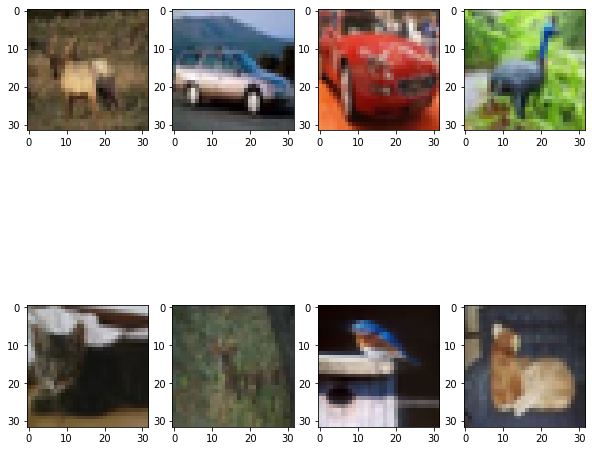

In [115]:
fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X_train_class04[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print("Shape of each image in the training data: ", X_train_class04.shape[1:])

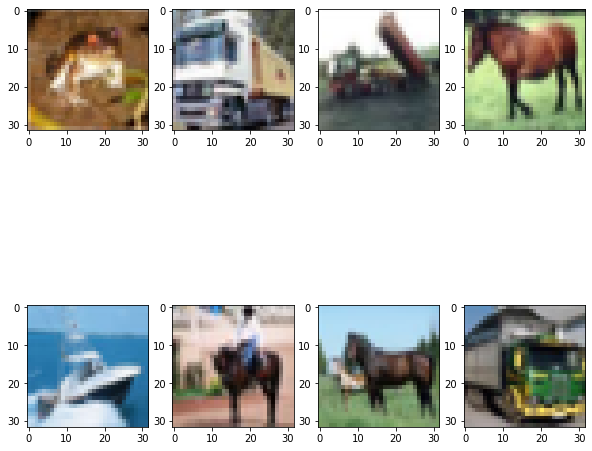

In [186]:
fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X_train_class510[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()


#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))



#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))



#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))


#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))



#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))

#Add Max Pool laye=r
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))

model.add(tf.keras.layers.Dense(1024, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [0]:
#Creating a checkpointer 
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='scratchmodel.best.hdf5', 
                               verbose=1,save_best_only=True)

In [153]:
y_train_class04.shape

(25000, 5)

In [154]:
X_train_class04.shape

(25000, 32, 32, 3)

In [155]:
#Fitting the model on the train data and labels.
model.fit(X_train_class04, y_train_class04, batch_size=32, epochs=5, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
19968/20000 [============================>.] - ETA: 0s - loss: 0.3769 - accuracy: 0.8334
Epoch 00001: val_loss improved from inf to 0.30396, saving model to scratchmodel.best.hdf5
20000/20000 [==============================] - 231s 12ms/sample - loss: 0.3769 - accuracy: 0.8334 - val_loss: 0.3040 - val_accuracy: 0.8648
Epoch 2/5
19968/20000 [============================>.] - ETA: 0s - loss: 0.3014 - accuracy: 0.8677
Epoch 00002: val_loss improved from 0.30396 to 0.27567, saving model to scratchmodel.best.hdf5
20000/20000 [==============================] - 230s 12ms/sample - loss: 0.3013 - accuracy: 0.8677 - val_loss: 0.2757 - val_accuracy: 0.8802
Epoch 3/5
19968/20000 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.8856
Epoch 00003: val_loss improved from 0.27567 to 0.24944, saving model to scratchmodel.best.hdf5
20000/20000 [==============================] - 231s 12ms/sample - loss: 0.2679 - accuracy: 0.

In [156]:
#Evaluate the model on the test data
score = model.evaluate(X_test_class04, y_test_class04)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

5000/5000 [==============================] - 14s 3ms/sample - loss: 0.2171 - accuracy: 0.9078
Accuracy on the Test Images:  0.9077999


In [0]:
predicted_classes=model.predict_classes(X_test_class04)
predicted_classes
y_test_class04=y_test_class04.argmax(1)

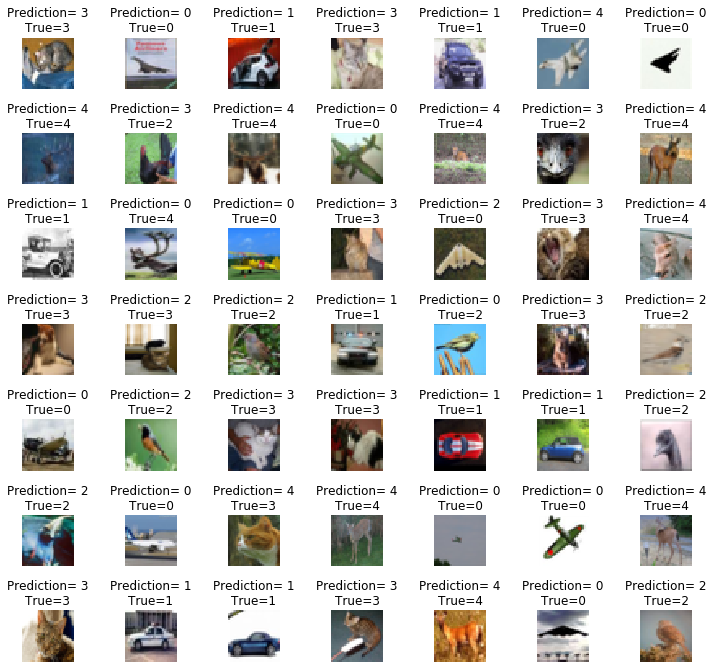

In [158]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test_class04[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test_class04[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [165]:
model.layers

In [193]:
for l in model.layers[:9]:
  print(l)
  l.trainable = False

In [0]:
trans_model = tf.keras.models.Sequential(model.layers[:9])

In [0]:
trans_model.add(tf.keras.layers.Dense(1024))
trans_model.add(tf.keras.layers.Activation('relu'))
trans_model.add(tf.keras.layers.Dense(1024))
trans_model.add(tf.keras.layers.Activation('relu'))
trans_model.add(tf.keras.layers.Dense(10))
trans_model.add(tf.keras.layers.Activation('softmax'))

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [196]:
trans_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Fitting the model on the train data and labels.
hist2=trans_model.fit(X_train_class510, y_train_class510, batch_size=32, epochs=5, 
          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)

trans_model.summary()

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
19968/20000 [============================>.] - ETA: 0s - loss: 0.1194 - accuracy: 0.9505
Epoch 00001: val_loss improved from 0.21483 to 0.09582, saving model to scratchmodel.best.hdf5
20000/20000 [==============================] - 87s 4ms/sample - loss: 0.1194 - accuracy: 0.9505 - val_loss: 0.0958 - val_accuracy: 0.9608
Epoch 2/5
19968/20000 [============================>.] - ETA: 0s - loss: 0.0962 - accuracy: 0.9605
Epoch 00002: val_loss improved from 0.09582 to 0.09012, saving model to scratchmodel.best.hdf5
20000/20000 [==============================] - 87s 4ms/sample - loss: 0.0962 - accuracy: 0.9606 - val_loss: 0.0901 - val_accuracy: 0.9633
Epoch 3/5
19968/20000 [============================>.] - ETA: 0s - loss: 0.0855 - accuracy: 0.9655
Epoch 00003: val_loss improved from 0.09012 to 0.08247, saving model to scratchmodel.best.hdf5
20000/20000 [==============================] - 87s 4ms/sample - loss: 0.0855 - accuracy: 0.96

In [198]:
#Evaluate the model on the test data
score = trans_model.evaluate(X_test_class510, y_test_class510)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])

5000/5000 [==============================] - 14s 3ms/sample - loss: 0.0903 - accuracy: 0.9660
Accuracy on the Test Images:  0.96595997


In [0]:
predicted_classes=trans_model.predict_classes(X_test_class510)
predicted_classes
y_test_class510=y_test_class510.argmax(1)

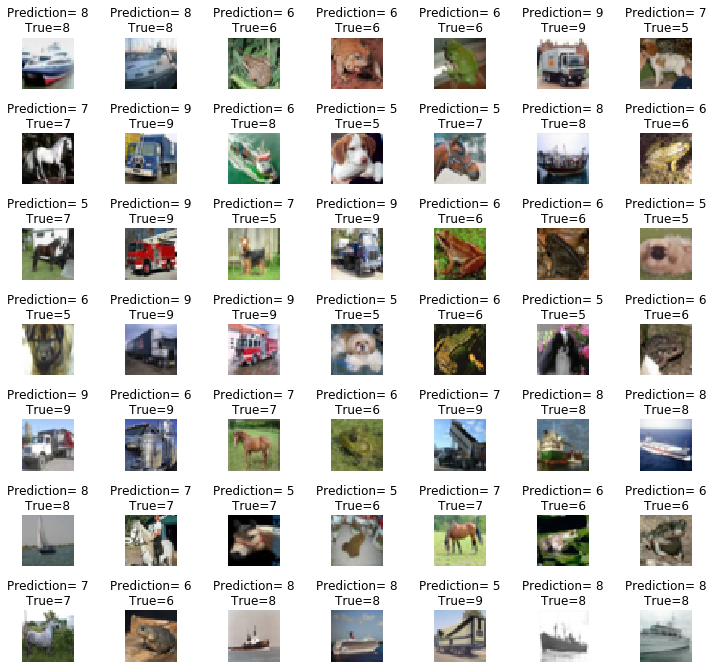

In [200]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test_class510[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test_class510[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Text classification using TF-IDF

In [0]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [204]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [208]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [209]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [210]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [211]:
twenty_train

{'DESCR': '.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total  

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [212]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm_train = vect.fit_transform(twenty_train.data)
features = vect.get_feature_names()
dtm_train.shape

(2257, 35482)

In [213]:
dtm_test=vect.transform(twenty_test.data)
dtm_test.shape

(1502, 35482)

In [214]:
print(features)

['00', '000', '0000', '0000001200', '000005102000', '0001', '000100255pixel', '00014', '000406', '0007', '000usd', '0010', '001004', '0010580b', '001125', '001200201pixel', '0014', '001642', '00196', '002', '0028', '003258u19250', '0033', '0038', '0039', '004021809', '004158', '004627', '0049', '00500', '005148', '00630', '008561', '0094', '00am', '00index', '00pm', '01', '0100', '010116', '010702', '011255', '011308pxf3', '011605', '011720', '012019', '012536', '012946', '013', '013034', '0131', '013423tan102', '013657', '0138', '013846', '0150', '015518', '01580', '015931', '01720', '01752', '0179', '01821', '01830', '0184', '01852', '01854', '01890', '0195', '0199', '01a', '01wb', '02', '020', '0200', '020504', '020637', '020646', '020701tan102', '020751', '02115', '02118', '02139', '02142', '02154', '02160', '021635', '021708', '02173', '0223', '02254', '022621tan102', '023044', '0235', '0237', '024103', '024150', '024626', '025240', '025924', '0278', '02908', '0293', '03', '030105

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [217]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(dtm_train, twenty_train.target)
y_pred_class = logreg.predict(dtm_test)
y_pred_train_class = logreg.predict(dtm_train)
print("Test Accuracy")
print(metrics.accuracy_score(twenty_test.target, y_pred_class))
print("Train Accuracy")
print(metrics.accuracy_score(twenty_train.target, y_pred_train_class))

Test Accuracy
0.9174434087882823
Train Accuracy
1.0
